In [1]:
import caiman as cm
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.source_extraction.cnmf import params as params
from glob import glob
from ScanImageTiffReader import ScanImageTiffReader
import numpy as np

from utils import tic, toc, ptoc

In [2]:
dpath = glob('E:/caiman_scratch/ori/out/*.hdf5')[-1]
jpath = glob('E:/caiman_scratch/ori/out/*.json')[0]
data = cnmf.load_CNMF(dpath)

In [82]:
c = data.estimates.C

In [83]:
import matplotlib.pyplot as plt

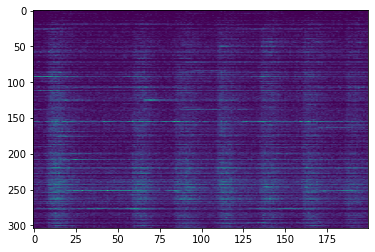

In [90]:
plt.imshow(c[:,0:200], aspect='auto')

In [6]:
these_maps = glob('E:/caiman_scratch/ori/MAP00*.mmap')
splits = [int(m.split('_')[-2]) for m in these_maps]

In [7]:
from caiman_analysis import make_trialwise, do_pre_dfof

In [74]:
c = do_pre_dfof(c, 'percentile', True)

In [85]:
d = make_trialwise(c, splits)

In [76]:
d.shape

(189, 304, 24)

In [77]:
c.shape

(304, 4930)

In [78]:
np.array(splits)

array([ 26,  26,  25,  25,  26,  25,  26,  25,  25,  25,  26,  26,  25,
        26,  25,  26,  25,  25,  26,  25,  26,  24,  26,  25,  26,  25,
        26,  25,  26,  25,  26,  25,  26,  25,  26,  25,  26,  25,  25,
        25,  26,  25,  26,  26,  25,  25,  26,  25,  25,  26,  25,  26,
        25,  25,  25,  26,  25,  26,  26,  25,  25,  26,  26,  25,  25,
        26,  25,  26,  25,  25,  26,  25,  26,  25,  25,  25,  26,  25,
        26,  25,  26,  26,  25,  26,  24,  26,  26,  25,  26,  25,  25,
        25,  26,  25,  26,  25,  25,  26,  25,  26,  25,  25,  26,  25,
        26,  25,  26,  25,  26,  26,  25,  26,  25,  25,  25,  26,  25,
        25,  26,  26,  25,  26,  25,  26,  25,  26,  25,  25,  25,  26,
        25,  25,  26,  25,  26,  26,  25,  26,  25,  25,  26,  25,  26,
        25,  26,  25,  25,  26,  25,  25,  26,  25,  25,  26,  26,  25,
        26,  25,  26,  25,  26,  25,  25,  26,  25,  25,  26,  25,  25,
        26,  25,  25,  26,  25,  26,  25,  26,  25,  25,  26,  2

In [87]:
# traces = np.split(c, np.cumsum(splits[:-1]), axis=1)
traces = np.split(c, np.cumsum(splits[:-1]), axis=1)
shortest = min([s.shape[1] for s in traces])
d = np.array([a[:, :shortest] for a in traces])

In [ ]:
for t in d.shape

Text(0.5, 0, 'Frames')

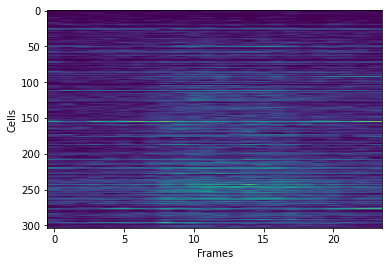

In [114]:
plt.imshow(d[9,:,:], aspect='auto')
plt.ylabel('Cells')
plt.xlabel('Frames')

In [92]:
d.shape

(189, 304, 24)

In [93]:
import vis

In [94]:
import seaborn as sns

In [95]:
sys.path.append('G:/My Drive/Code/analysis-dev')
from analysis_main import Daq

In [96]:
daq = Daq('E:/caiman_scratch/200309_A_hr_fixed.mat', 3)

In [97]:
vis_id = daq.vis_stim
oris = np.arange(-45,360,45) # oris used
vis_oris = np.array(list(map(lambda x: oris[x], vis_id-1))) # convert visIDs to orientations (trialwise)

In [98]:
df = vis.create_df(d, vis_oris, 'ori',fr=6.36)

In [99]:
df

cell  trial     time          df frame  ori
0           0      0        0    0.000000     0   90
1           0      1        0    0.000000     0  -45
2           0      2        0    0.000000     0  270
3           0      3        0    0.000000     0  180
4           0      4        0   51.998203     0  225
...       ...    ...      ...         ...   ...  ...
1378939   303    184  3.61635   54.456371    23  180
1378940   303    185  3.61635  135.288531    23  -45
1378941   303    186  3.61635   93.323546    23    0
1378942   303    187  3.61635    0.000000    23  270
1378943   303    188  3.61635   43.333659    23  -45

[1378944 rows x 6 columns]

In [100]:
sys.path.append('G:/My Drive/Code')
import holoframe as hf

In [101]:
df = hf.HoloFrame(df)

In [102]:
win = (0, .9, 1.1, 1.8)

In [103]:
df = vis.find_vis_resp(df, win)

There are 185 visually responsive cells, out of 304 (60.86%)


In [104]:
mdf = hf.HoloFrame(vis.meanby(df, win, 'ori'))

In [105]:
mdf

cell  ori  trial          df    vis_ps  vis_resp
0         0  -45      1  -36.464874  0.259867     False
1         0  -45     14   -0.583898  0.259867     False
2         0  -45     33    0.000000  0.259867     False
3         0  -45     58    0.000000  0.259867     False
4         0  -45     63    3.570004  0.259867     False
...     ...  ...    ...         ...       ...       ...
57451   303  315    117   68.102858  0.000008      True
57452   303  315    126  150.650074  0.000008      True
57453   303  315    168    2.586710  0.000008      True
57454   303  315    178   23.940407  0.000008      True
57455   303  315    183   20.518437  0.000008      True

[57456 rows x 6 columns]

In [106]:
import chrome_vis.plot as vp

In [107]:
pdirs = vis.pdir(mdf)
mdf = mdf.add_cellwise(pdirs, name='pdir')

In [108]:
mdf = vis.po(mdf)

In [109]:
mdf = vis.osi(mdf)

In [110]:
df = df.join(mdf.set_index(['cell', 'ori']), ['cell', 'ori'], rsuffix='_mean')

Text(0.5, 0, 'Preferred Orientation')

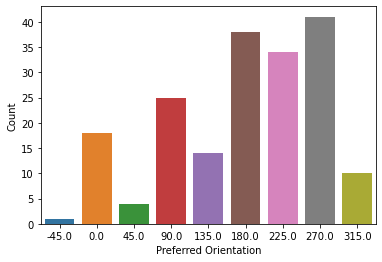

In [111]:
dat = mdf[mdf.vis_resp==True].groupby('cell').mean()
dat['pref'] = dat['pref'].astype(np.int)
g = sns.countplot(x='pdir', data=dat.groupby('cell').mean())
g.set_ylabel('Count')
g.set_xlabel('Preferred Orientation')

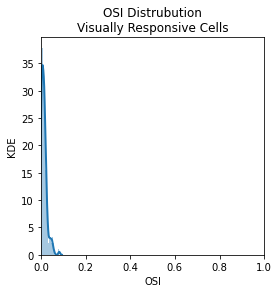

In [112]:
celldf = mdf[mdf.vis_resp==True].groupby('cell').mean()
fig, ax = plt.subplots(1,1, figsize=(4,4))

kde_opts = {
        'lw':2
    }

# for the histogram/kde
sns.distplot(celldf.osi.unique(), kde_kws=kde_opts, ax=ax)
ax.set_xlim([0,1])
ax.set_xlabel('OSI')
ax.set_title('OSI Distrubution\nVisually Responsive Cells')
ax.set_ylabel('KDE')
plt.subplots_adjust(wspace=0.4)

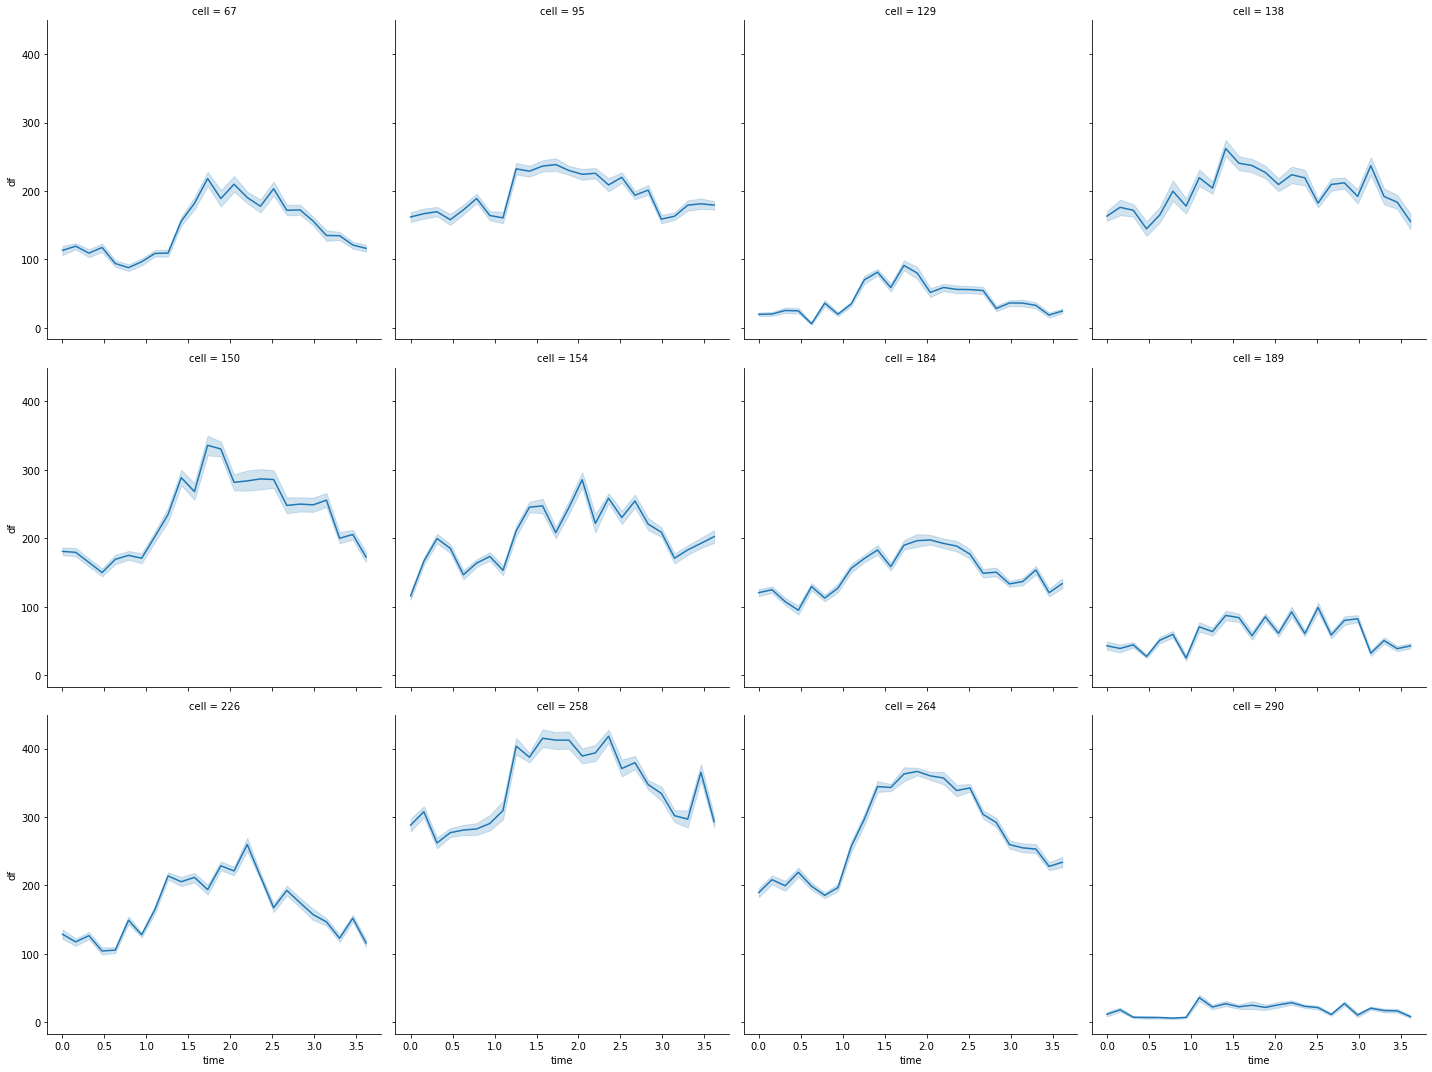

In [115]:
cells = np.random.choice(mdf[mdf.vis_resp==True].cell.unique(), 12, replace=False)

sns.relplot(x='time', y='df', data=df[(df.vis_resp == True) & (df.cell.isin(cells)) & (df.ori==df.pdir)], col='cell', col_wrap=4, kind='line')